<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Grover

In [19]:
import numpy as np
import math, cmath
from qiskit import IBMQ, QuantumCircuit, Aer, execute, QuantumRegister, transpile
from qiskit.providers.aer import Aer
from qiskit.quantum_info import Operator
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *

# basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2024-01-23 06:26:06,083: Credentials are already in use. The existing account in the session will be replaced.


#### EJERCICIO

Crea las siguientes funciones auxiliares:

- __get_probabilities__: que tome como entrada un vector de estados y devuelva las probabilidades de todos sus compoentes
- __get__phases__: que tome como entrada un vector de estados y devuelva las fases de todos sus compoentes
- __svector_viz__: que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades, las fases de cada componente del vector  y la visualizacion de plot_bloch_multivector

In [2]:
def get_probabilities(svector):
    return np.power(np.abs(svector.data),2)

def get_phases(svector):
    return np.array([math.degrees(cmath.polar(c)[1]) for c in svector.data])

def svector_viz(qc):
    #medimos el estado
    qc.save_statevector() #hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida)
    backend = Aer.get_backend('aer_simulator')
    results=backend.run(qc).result()
    psi=results.get_statevector()
    display(array_to_latex(psi))
    display('probabilities',get_probabilities(psi))
    display('phases',get_phases(psi))
    display(plot_bloch_multivector(psi,reverse_bits=True))

## Oraculo

Para construir el oráculo vamos a ver primero cual es la matriz unitaria $U$ de este circuito, porque va a ser muy sencilla de crear. Esto nos ayudará a crear un oráculo de una forma mucho mas sencilla que con todas las puertas.

### EJERCICIO

Construye en el composer el circuito 3 qubits del oraculo del algoritmo de Grover para el estado |000>.
Ejecutalo en el simulador y obten la matriz unitaria del circuito

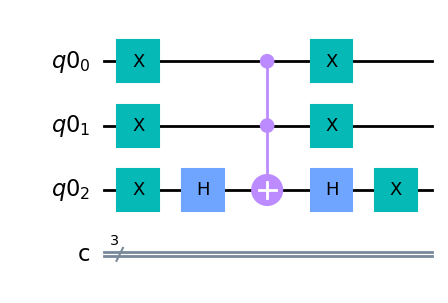

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q0 = QuantumRegister(3, 'q0')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q0, creg_c)

circuit.x(qreg_q0[0])
circuit.x(qreg_q0[1])
circuit.x(qreg_q0[2])
circuit.h(qreg_q0[2])
circuit.ccx(qreg_q0[1], qreg_q0[0], qreg_q0[2])
circuit.h(qreg_q0[2])
circuit.x(qreg_q0[0])
circuit.x(qreg_q0[1])
circuit.x(qreg_q0[2])
circuit.draw()

In [4]:
#creamos el backend con el simulador
simulator = Aer.get_backend('aer_simulator')

#save_unitary debe de ejecutarse despues de haber importado el simulador, si no el circuito no podra utilizar este metodo
# en lugar de medir los resulatados de los qubits del circuito vamos a estimar la matriz que representan sus operaciones
circuit.save_unitary()

# Obtenemos su matriz
result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)
print("Circuit unitary:\n", unitary.to_matrix())

Circuit unitary:
 [[-1.00000000e+00+1.8369702e-16j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  -2.22044605e-16+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  1.00000000e+00-1.8369702e-16j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   1.00000000e+00-1.8369702e-16j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+6.1232340e-17j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  1.00000000e+00-1.8369702e-16j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0

### EJERCICIO

Construye en el composer el circuito 3 qubits del oraculo del algoritmo de Grover para el estado |111>.
Ejecutalo en el simulador y obten la matriz unitaria del circuito

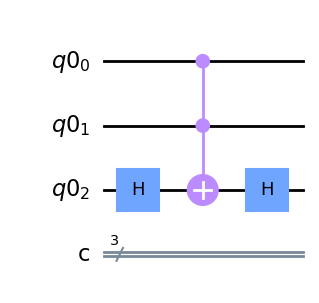

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q0 = QuantumRegister(3, 'q0')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q0, creg_c)

circuit.h(qreg_q0[2])
circuit.ccx(qreg_q0[1], qreg_q0[0], qreg_q0[2])
circuit.h(qreg_q0[2])
circuit.draw()

In [6]:
#creamos el backend con el simulador
simulator = Aer.get_backend('aer_simulator')

#save_unitary debe de ejecutarse despues de haber importado el simulador, si no el circuito no podra utilizar este metodo
# en lugar de medir los resulatados de los qubits del circuito vamos a estimar la matriz que representan sus operaciones
circuit.save_unitary()

# Obtenemos su matriz
result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)
print("Circuit unitary:\n", unitary.to_matrix())

Circuit unitary:
 [[ 1.00000000e+00-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  1.00000000e+00-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   1.00000000e+00-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+6.1232340e-17j  0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j  1.00000000e+00-6.1232340e-17j
   0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0

#### EJERCICIO

Contruimos el oráculo con una funcion __phase_oracle__ donde codificamos el estado que representa la cadena que queremos buscar con fase $\pi$.

En este caso, construir el circuito con puertas elementales es algo complicado pero construirlo a partir de la matriz $U$ que representa el circuito es muy sencillo. Pensemos que esta matriz $U$ sería como la matriz identidad salvo que en la fila del estado que estamos buscando ponemos un -1 o sea, le cambiamos la fase a $\pi$.

La funcion que construye el oráculo de fase debe de devolver el circuito que se crea a aprtir de esta matriz unitaria

In [7]:
def phase_oracle(n, indices_to_mark, name="Oracle"):
    # n num qubits del circuito
    # indices_to_mark lista de indices de la diagonal que marcamos a -1 (podemos marcar mas de un indice para la busqueda)
    qc = QuantumCircuit(n, name=name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    qc.unitary(Operator(oracle_matrix), range(n))
    return qc

#### EJERCICIO

Probamos el oráculo:
- input estado $|0000...0>$ que en notacion matricial es $[1,0,0,0,...0]$ y el indice a marcar es 0
- la salida es el mismo estado pero con un cambio de fase, en el estado que hemos marcado pone una fase de $\pi$

Utiliza la funcion auxiliar __svector_viz__ para comprobar el estado resultado de ejecucion del Oráculo

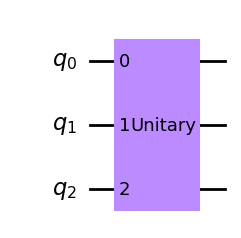

<IPython.core.display.Latex object>

'probabilities'

array([1., 0., 0., 0., 0., 0., 0., 0.])

'phases'

array([180.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

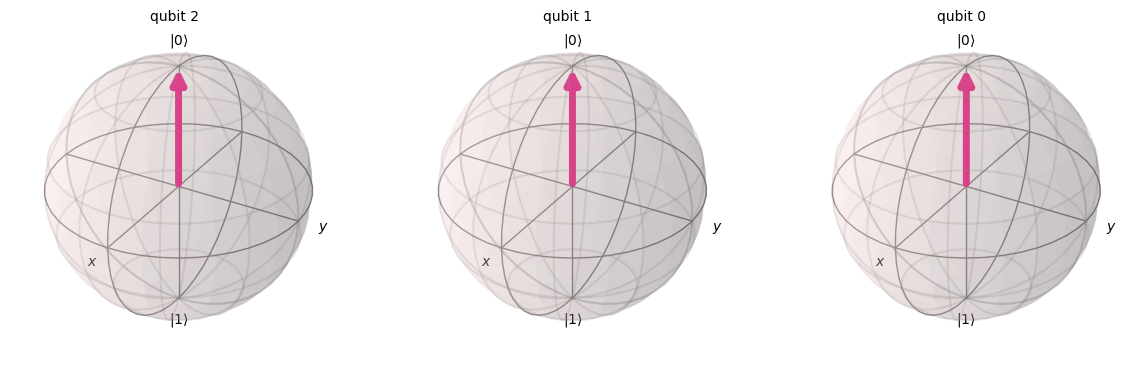

In [8]:
n=3
oracle=phase_oracle(n,[0],name='Oracle 000')

#descomentar para mostrar el circuito y vector de estados en este paso
display(oracle.draw())
svector_viz(oracle)

## Algoritmo de Grover

El algoritmo de Grover se compone de la iteracion de tres partes:
- Parte 1, un bloque de puertas de Hadamard, que pone todos los qubits de entrada en superposicion
- Parte 2, el oráculo
- Parte 3, un bloque de difusion que pone las amplitudes de los estados a un nivel promediado entre todos

Las partes 2 y 3 se repiten a conveniencia para conseguir una mayor probabilidad en el estado buscado, en torno a $\sqrt n$ veces.

Es importante observar que el bloque de difusion, es simplemente el oráculo de fases con el primer estado marcado. De esta forma podemos construir el algoritmo de una forma muy sencilla con la ayuda de dos funciones __difuser__ y __grover__

#### EJERCICIO

Ya hemos creado la funcion __phase_oracle__ que crea el Oráculo del algoritmo.

Ahora creamos la funcion __difusser__ que implementa un circuito difussor que realiza la Amplificacion de Amplitud. Recordar que podemos implementarla de forma sencilla a partir de la funcion __phase_oracle__

Finalmente crearemos la funcion __grover__ que implementará el circuito del algoritmo de Grover (puertas H+ r veces (oráculo + difusor)). 

Donde el numero de veces $r$ que debemos de iterar el ciruito viene dado en el codigo


In [14]:
def diffuser(n):
    qc = QuantumCircuit(n, name='Diff - "V"')
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    return qc

def grover(n, marked):
    qc = QuantumCircuit(n, n)
    # calculamos el numero optimo de veces que debemos repetir la ejecucion de las partes 2 y 3
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n))) - 1/2))
    print(f'Para {n} qubits, donde hemos marcado el estado de la base {marked}, hacemos {r} iteraciones')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n, marked), range(n))
        qc.append(diffuser(n), range(n))
    qc.measure(range(n), range(n))
    return qc

### Ejecucion del Algoritmo de Grover en el simulator

#### EJERCICIO

Para un numero dado de qubits $n$, genera un numero aleatorio del total posible $N=2^n$

Ejecutar el algoritmo de Grover con el Oráculo preparado para el numero anterior generado aleatoriamente, el numero de iteraciones optima

Ejecutalo en el simulador y pon un numero alto de shots (10000, por ejemplo para dar alguna posibilidad de que aparezcan las amplitudes de otros estados no buscados)

6
Para 4 qubits, donde hemos marcado el estado de la base [6], hacemos 3 iteraciones


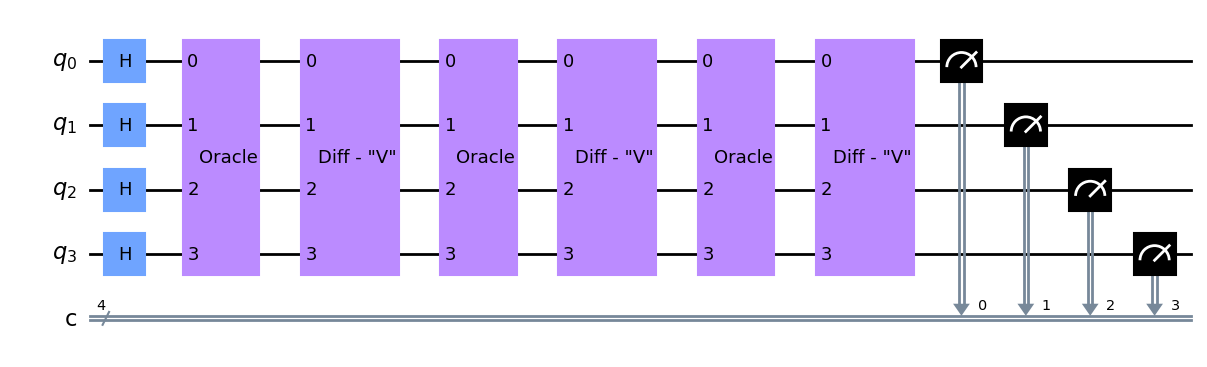

In [20]:
n = 4
x = np.random.randint(2**n)
print(x)
marked = [x]
qc = grover(n, marked)

qc.draw()

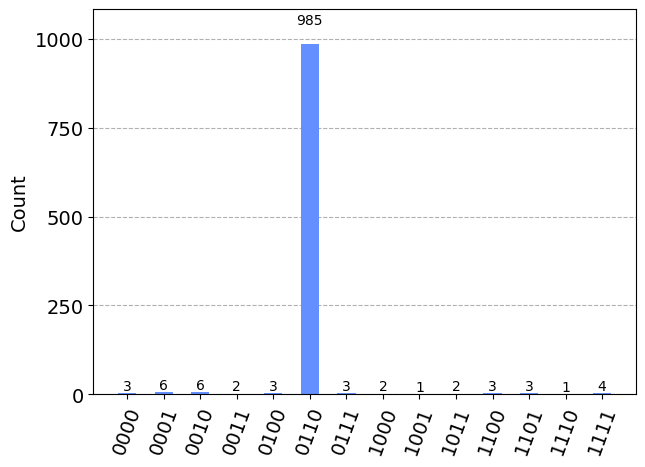

In [22]:
#Medimos que resultados da este circuito funcion
backend = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, backend)   #como el circuito es un Operador, una Intruccion es necesario transpilar
counts=backend.run(t_qc).result().get_counts()
display(plot_histogram(counts))

{'0100': 16, '0001': 21, '1010': 20, '1101': 30, '1011': 30, '0011': 23, '0111': 27, '1111': 20, '1100': 32, '0110': 9649, '1000': 23, '0010': 26, '0000': 18, '1001': 19, '0101': 27, '1110': 19}


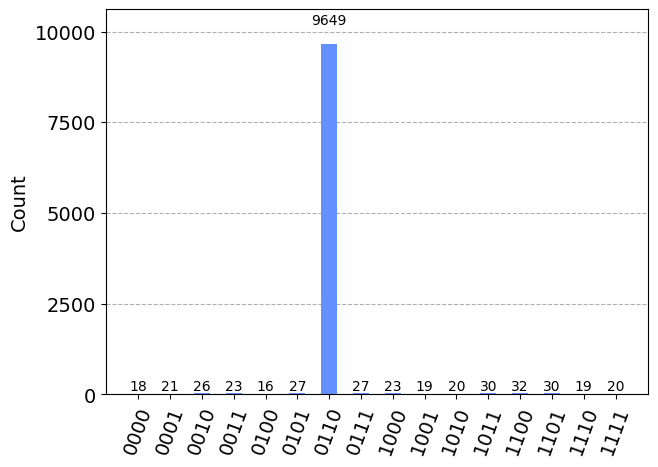

In [24]:
#otra forma de ejecutarlo con execute en lugar de con run
backend = Aer.get_backend('aer_simulator')
result = execute(qc, backend, shots=10000).result()  #si no queremos transpilar podemos usar execute
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

#### EJERCICIO

Vamos a ver la ejecucion del algoritmo iteracion a iteracion

Para ello ejecutamos el algoritmo de Grover y en cada ejecucion guardamos el resultado de la simulacion para representarlas todas de forma conjunta con la funcion __plot_histogram__ y ver la ganancia de Amplificacion de Amplitud en cada ejecucion

[13]
Para 4 qubits, donde hemos marcado el estado de la base [13]-> ejecucion optima 3
Hacemos la 0 de 3 iteraciones
Hacemos la 1 de 3 iteraciones
Hacemos la 2 de 3 iteraciones
Los resultados para la primera iteracion:


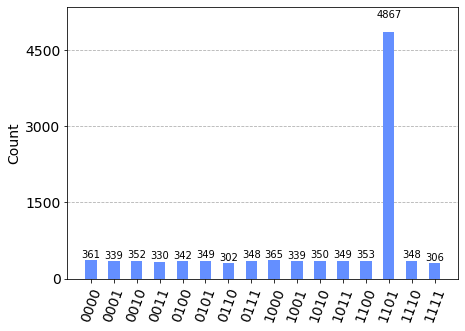

In [32]:
def grover_run_roundwise(n, marked):
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'Para {n} qubits, donde hemos marcado el estado de la base {marked}-> ejecucion optima {r}')
    counts = []
    for i in range(r):
        print(f'Hacemos la {i} de {r} iteraciones')
        qc = QuantumCircuit(n, n)
        qc.h(range(n))
        for _ in range(i+1):
            qc.append(phase_oracle(n, marked), range(n))
            qc.append(diffuser(n), range(n))
        qc.measure(range(n), range(n))
        result = execute(qc, backend, shots=10000).result()
        counts.append(result.get_counts(qc))
    return counts

print(marked)
backend = Aer.get_backend('qasm_simulator')
counts = grover_run_roundwise(n, marked)

print('Los resultados para la primera iteracion:')
plot_histogram(counts[0])   #mostrar todas->counts , la segunda ->counts[1] etc...

In [33]:
print(counts[0])

{'1110': 348, '0101': 349, '1001': 339, '1011': 349, '0111': 348, '0011': 330, '1101': 4867, '1100': 353, '0110': 302, '1000': 365, '1010': 350, '0000': 361, '0010': 352, '0001': 339, '1111': 306, '0100': 342}


Los resultados para todas las iteraciones en el mismo histograma

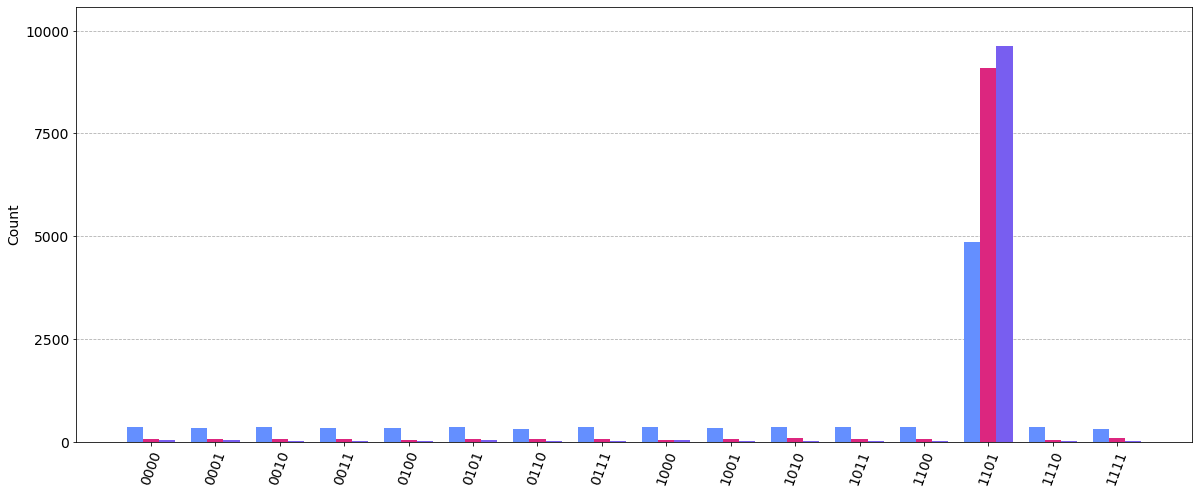

In [34]:
plot_histogram(counts, bar_labels=False,figsize=(20,8))

#### EJERCICIO

Podemos tambien verificar que pasa si nos pasamos de ejecutarlo mas veces del numero de veces optimo

Ejecutar el algoritmo de Grover para n=4 qubits una vez más de lo optimo y ver que perdemos probabilidad de encontrar la cadena buscada:

In [35]:
n = 4
x = np.random.randint(2**n)
print(x)
marked = [x]
print(marked)

14
[14]


[14]
Para 4 qubits, donde hemos marcado el estado de la base [14] -> ejecucion optima 4
Hacemos la 0 de 4 iteraciones
Hacemos la 1 de 4 iteraciones
Hacemos la 2 de 4 iteraciones
Hacemos la 3 de 4 iteraciones
Los resultados para la primera iteracion:


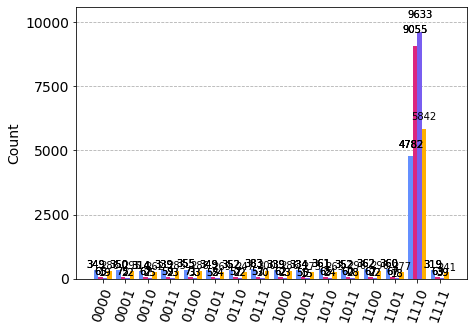

In [36]:
def grover_run_roundwise_unamas(n, marked):
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)) +1
    print(f'Para {n} qubits, donde hemos marcado el estado de la base {marked} -> ejecucion optima {r}')
    counts = []
    for i in range(r):
        print(f'Hacemos la {i} de {r} iteraciones')
        qc = QuantumCircuit(n, n)
        qc.h(range(n))
        for _ in range(i+1):
            qc.append(phase_oracle(n, marked), range(n))
            qc.append(diffuser(n), range(n))
        qc.measure(range(n), range(n))
        result = execute(qc, backend, shots=10000).result()
        counts.append(result.get_counts(qc))
    return counts

print(marked)
backend = Aer.get_backend('qasm_simulator')
counts = grover_run_roundwise_unamas(n, marked)

print('Los resultados para la primera iteracion:')
plot_histogram(counts)   #mostrar todas->counts , la segunda ->counts[1] etc...

#### EJERCICIO

Podemos ver que ocurre si marcamos para la busqueda mas de un elemento

Para un numero dado de qubits $n$, genera dos numerso aleatorio del total posible $N=2^n$

Ejecutar el algoritmo de Grover con el Oráculo preparado para estos numeros  aleatorios, el numero de iteraciones optima

Ejecutalo en el simulador y pon un numero alto de shots (10000, por ejemplo para dar alguna posibilidad de que aparezcan las amplitudes de otros estados no buscados)

Para 4 qubits, donde hemos marcado el estado de la base [4, 3], hacemos 2 iteraciones


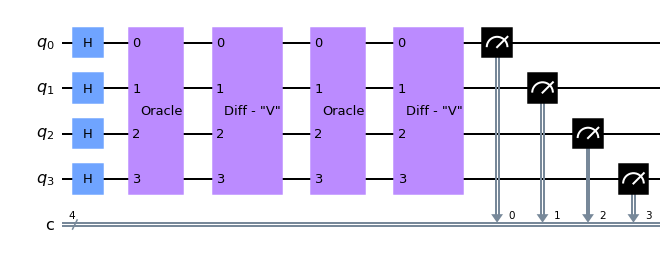

In [37]:
n = 4
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y == x:
    y = np.random.randint(2**n)
marked = [4, 3]

qc = grover(n, marked)

qc.draw()

{'1101': 35, '0010': 40, '0100': 4739, '0111': 41, '0011': 4722, '1011': 32, '1100': 37, '1001': 37, '0101': 49, '1110': 39, '0001': 28, '1111': 43, '0000': 31, '1010': 37, '1000': 48, '0110': 42}


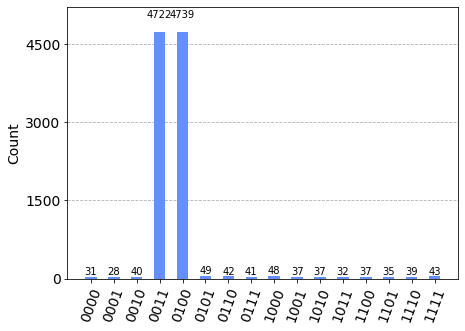

In [38]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=10000).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## Ejecucion en un simulador con ruido

#### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Grover, para ello:

- Tomamos n=3 qubits y generamos un numero aleatorio que vamos a buscar para construir nuestro oráculo
- Creamos el circuito cuántico, que llamamos <b>grover_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulado

In [39]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import Aer, AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.fake_provider import FakeVigo

Para 3 qubits, donde hemos marcado el estado de la base [4], hacemos 2 iteraciones


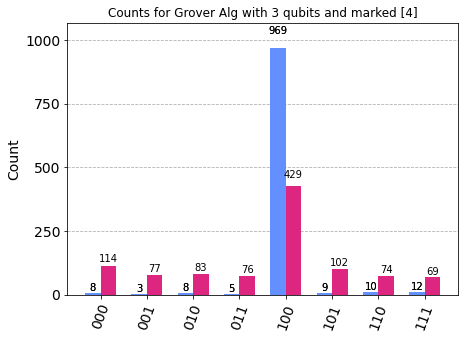

In [40]:
#Construir el circuito
n = 3
x = np.random.randint(2**n)
marked = [x]

qc = grover(n, marked)

##SIN RUIDO
sim = Aer.get_backend('aer_simulator')
# Transpilamos el circuito para mapearlo a las puertas ruidosas
tcirc = transpile(qc, sim)
# Ejecutamos el circuito y obtenemos el resultado
result = sim.run(tcirc).result()
counts = result.get_counts(0)


##CON RUIDO
# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(device_backend)
# Transpilamos el circuito para mapearlo a las puertas ruidosas
tcirc_ruido = transpile(qc, sim_vigo)
# Ejecutamos el circuito y obtenemos el resultado
result_noise = sim_vigo.run(tcirc_ruido).result()
counts_noise = result_noise.get_counts(0)

##RESULTADOS
plot_histogram([counts,counts_noise],
               title=f"Counts for Grover Alg with {n} qubits and marked {marked}")

Comparamos como el ruido afecta a los resultados y que a pesar del ruido podemos encontrar el estado que buscábamos.

## Ejecucion en un BackEnd cuántico

#### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Grover, para ello:

- Tomamos n=3 qubits y generamos un numero aleatorio que vamos a buscar para construir nuestro oráculo
- Creamos el circuito cuántico, que llamamos <b>grover_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

Estados marcados [4]
Para 3 qubits, donde hemos marcado el estado de la base [4], hacemos 2 iteraciones


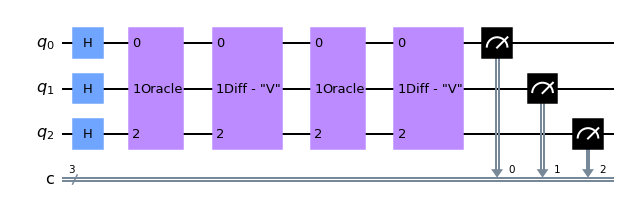

In [41]:
n = 3
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y == x:
    y = np.random.randint(2**n)
marked = [x]#, y]
print(f'Estados marcados {marked}')

qc = grover(n, marked)
display(qc.draw())

In [42]:
# provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
# backend = provider.get_backend('ibm_hanoi')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n \
                                                        and not x.configuration().simulator \
                                                        and x.status().operational == True))
print(f'backend: {backend}')

backend: ibmq_lima


In [43]:
%qiskit_job_watcher  #lanzamos el widget de job_watcher para hacer seguimiento

shots = 20000
job = execute(qc, backend=backend, shots=shots, optimization_level=3)
print(job.job_id())

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

63808722ad24144d02114583


In [44]:
# Para comprobar los resultados de un job id 
#provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
backend = provider.get_backend('ibmq_belem')
#job = backend.retrieve_job('635bebcd227bc1abf77e6ae8') #5qubits busqueda 3 estados Estados marcados [17, 31]
job = backend.retrieve_job('635bfa9a7a93ee8583e256a4')   #3qubits busqueda 2 estados Estados marcados [4, 3]
#job = backend.retrieve_job('635bfdf7ec45f9332d87889b')   #5qubits busqueda 1 estado Estados marcados [21]

In [45]:
backend = provider.get_backend('ibm_nairobi')
job = backend.retrieve_job('637d20473f146d9c2aeebf06') #3qubits busqueda 1 estados Estado marcado [2]

In [48]:
backend = provider.get_backend('ibmq_lima')
job = backend.retrieve_job('63808722ad24144d02114583') #3qubits busqueda 1 estados Estado marcado [2]

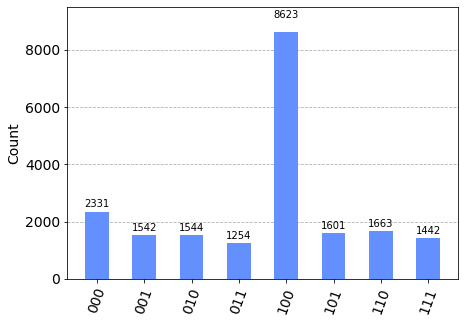

In [49]:
# get results
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In [47]:
count_to_digital_values(answer)

INPUT-----count----percent
000 ----- 2191 ----- 0.10955
100 ----- 1530 ----- 0.0765
001 ----- 2218 ----- 0.1109
101 ----- 1524 ----- 0.0762
010 ----- 7824 ----- 0.3912
110 ----- 1548 ----- 0.0774
011 ----- 1906 ----- 0.0953
111 ----- 1259 ----- 0.06295
shots totales 20000


En el ordenador cuántico real, comprobamos si a pesar del ruido podemos encontrar los estados que buscábamos.